### 1. Problem Formulation

For a Retail bank, analyse the current loans and its customer profiles so as to help classify good and NOT a good loan applications in future.

If a future loan application meets all required criteria then its a good loan, while if it doesn't then it's NOT a good loan.

### 2. Libraries / Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.feature_selection import RFE 
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})


### 3. Data Preprocessing

In [2]:
# Load the dataset and place it into a Dataframe

# If you want to load csv without DafaFrame including an index column
# df = pd.read_csv('loans.csv', index_col = 0)

df = pd.read_csv('loans.csv')

#### a) Exploratory Data Analysis

##### Number of observations (rows) and features (columns)

In [3]:
# Check the top 5 rows.
df.head(5)

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Status,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [4]:
# Check the bottom 5 rows.
df.tail(5)

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Status,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
1001,Type C,Average (known delays),TV,12759.0,500-1000,5-7 Years,Male,No,Vehicle,38.0,House Owner,Professional / Management,No,Yes
1002,Type C,Average (known delays),Buying a New Car,2551.0,0-200,7+ Years,Male,No,Vehicle,47.0,House Owner,Services,No,No
1003,Type C,Average (known delays),TV,1587.0,200-500,7+ Years,Male,No,Vehicle,35.0,House Owner,Services,No,Yes
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Print the shape
print(df.shape)

(1006, 14)


##### Number of elements (data values) in each feature

In [6]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Type of Account        1004 non-null   object 
 1   Account History        1004 non-null   object 
 2   Reason for the Loan    1003 non-null   object 
 3   Loan Amount            1003 non-null   float64
 4   Account Savings        1002 non-null   object 
 5   Employment History     1001 non-null   object 
 6   Individual Status      1001 non-null   object 
 7   Other Loans            1001 non-null   object 
 8   Security / Collateral  1001 non-null   object 
 9   Age                    1002 non-null   float64
 10  Residence Status       1002 non-null   object 
 11  Job                    1002 non-null   object 
 12  Completed Other loan?  1002 non-null   object 
 13  Good Loan              1001 non-null   object 
dtypes: float64(2), object(12)
memory usage: 110.2+ KB


##### Investigate string values in the numerical columns and replace it with zeros

In [ ]:
# isnull() method cannot find string values.
#Check the csv file for any string values other than NaN or NA

##### Investigate null data values in the dataset and replace it with zeros

In [3]:
# Null values = missing values or invalid values like Not a Number (NaN).
df.isnull().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Status        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [7]:
# Individually investigate these rows with null values to decide whether to
# to keep it or edit it.
# Shows all rows with NaN in 'Individual Status'
df[df['Individual Status'].isnull()] 

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Status,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# As null values in 'Individual Status' column has almost empty rows, drop those rows.
df = df.dropna(subset = ['Individual Status'])

In [9]:
# Print the shape
print(df.shape) # dropped from 1006 to 1001 (5 rows will null values dropped)

(1001, 14)


In [10]:
# Rerun to check the Null values
df.isnull().sum() # there is none.

Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Status        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

##### Investigate unique values in the dataset

In [11]:
# Query goes through all values in each column, then counts them and then
# lists them.
# These unique values will become INDIVIDUAL NUMERICAL COLUMNS when converted
# from categorical to numerical representation.

for column in df:
    unique_values = np.unique(df[column])
    count_unique_values = len(unique_values)
    if count_unique_values < 10:
        print('The number of unique values for features {} :{} -- {}'.format(column, count_unique_values, unique_values))
    else:
        print('The number of unique values for features {} :{}'.format(column, count_unique_values))

The number of unique values for features Type of Account :4 -- ['No Data' 'Type A' 'Type B' 'Type C']
The number of unique values for features Account History :3 -- ['Average (known delays)' 'Good' 'critical']
The number of unique values for features Reason for the Loan :10
The number of unique values for features Loan Amount :911
The number of unique values for features Account Savings :5 -- ['0-200' '1000+' '200-500' '500-1000' 'No Data']
The number of unique values for features Employment History :5 -- ['0-2 Years' '2-5 Years' '5-7 Years' '7+ Years' 'Unemployed']
The number of unique values for features Individual Status :5 -- ['Divorced' 'Female' 'Female_' 'Male' 'Married']
The number of unique values for features Other Loans :2 -- ['No' 'Yes']
The number of unique values for features Security / Collateral :4 -- ['No Security' 'Property - Real Estate' 'Savings Account' 'Vehicle']
The number of unique values for features Age :57
The number of unique values for features Residence Sta

In [ ]:
# The above unique values shows column 'Loan Amount' and 'Age' as numerical values. 
# The rest are categorical values.
# The categorical features have to be converted to numerical representation 
# to be used in the logistic regression algorithm.

##### Investigate distribution and relationships

In [ ]:
# Closely visualize the relationship between the 'Loan Amount' and 'Age'
# becaue its the only two numerical features available in the dataset.
# This allows to remove any outliers.
# sns.pairplot(df). Can do this too as df only has two numerical features.
sns.pairplot(df[['Loan Amount', 'Age']])

In [ ]:
# Visualize histogram plot for 'Loan Amount'
plt.figure(figsize = (10, 5))
df['Loan Amount'].plot(kind='hist')

In [ ]:
# Visualize histogram for 'Age'
plt.figure(figsize = (10, 5))
df['Age'].plot(kind='hist')

#### b) Data Cleaning

In [12]:
# Remove the outliers based on sns.pairplot()
df_filtered = df[df['Age'] < 100] # Keeps only values less than 100

df_filtered.shape

(1000, 14)

In [ ]:
# Visualize the relationship between the 'Loan Amount' and 'Age' after cleaning.
sns.pairplot(df_filtered[['Loan Amount', 'Age']])

In [ ]:
# Visualize the relationship between the 'Loan Amount' and 'Age' after cleaning.
# And find out how the feature 'Good Loan' plays a role in this relationship 
# between 'Loan Amount' and 'Age'
sns.pairplot(df_filtered[['Loan Amount', 'Age']], hue = 'Good Loan')
# It shows that most of the 'Good Loan' is concentrated in the region of 
# lower loan amount and lower age. As loan amount increases it's not a good
# loan and as age increases its not a good loan.

#### c) Data Aggregation

#### d) Data Join / Merge

#### e) Data Scaling - Normalization / Standardization

In [ ]:
# No need to normalize/standardize data in logistic regression due to the
# logistic function (0 or 1)

#### f) Data Conversion - Numerical / Categorical

In [13]:
# Recalling all the column labels
df_filtered.columns

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Status', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

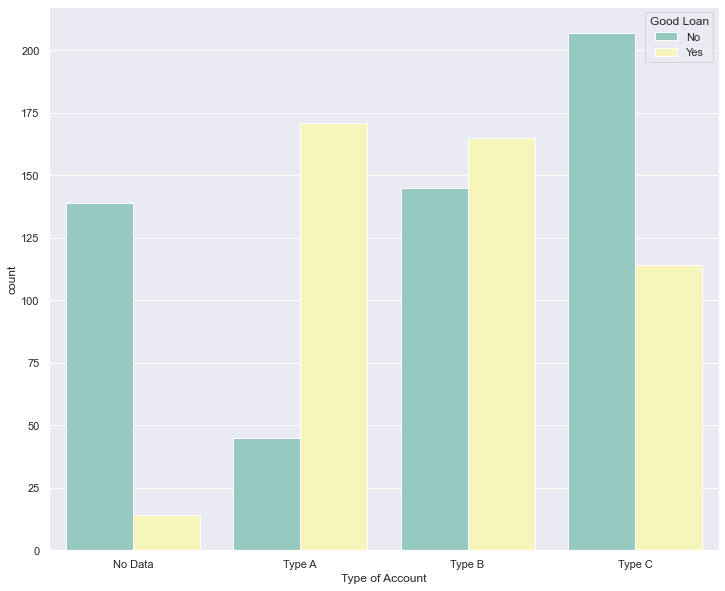

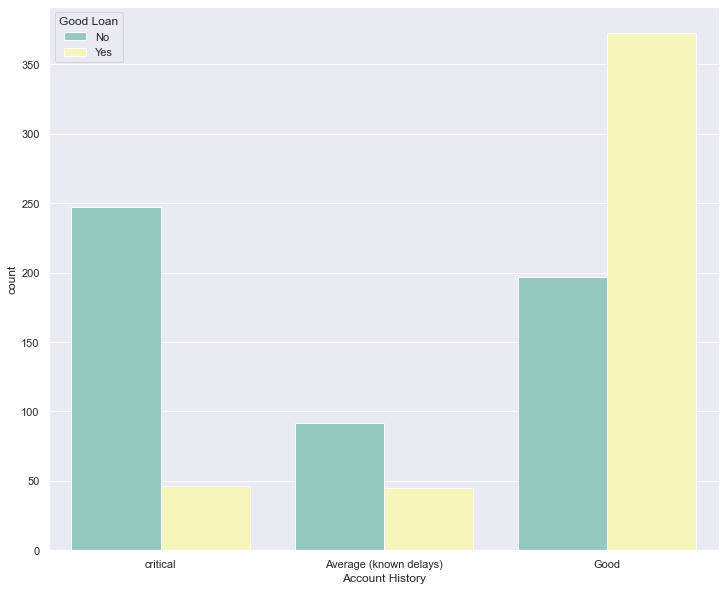

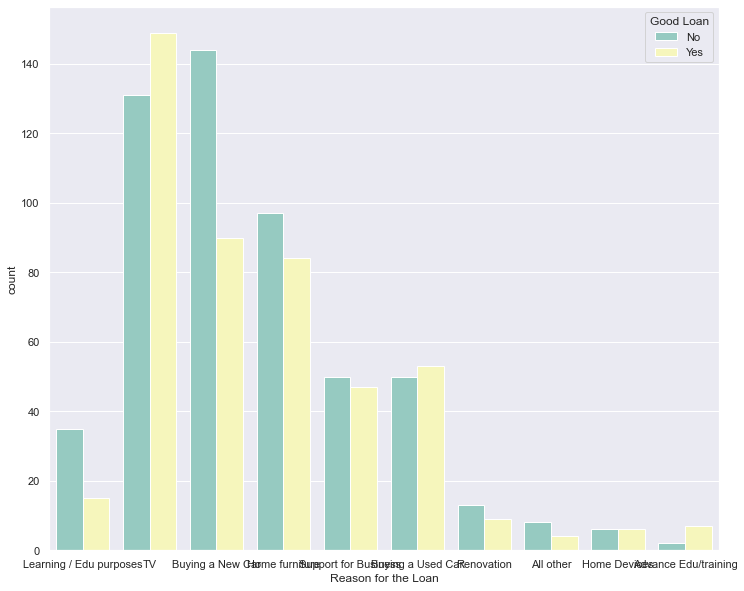

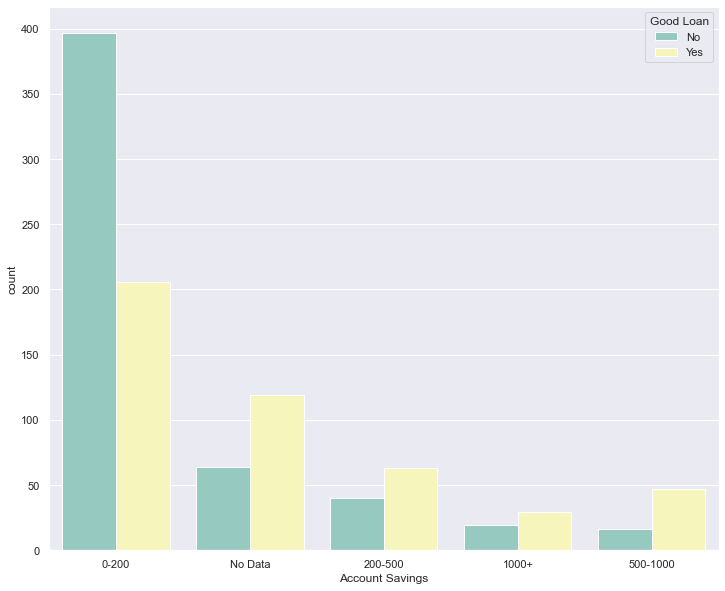

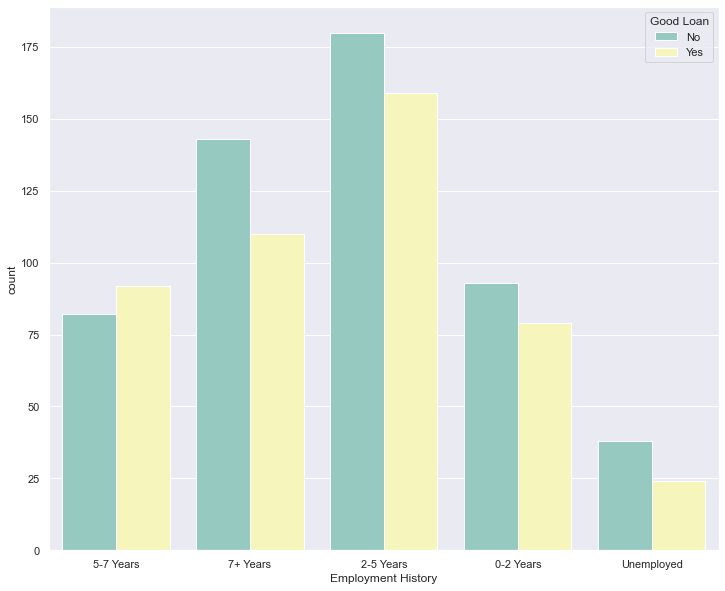

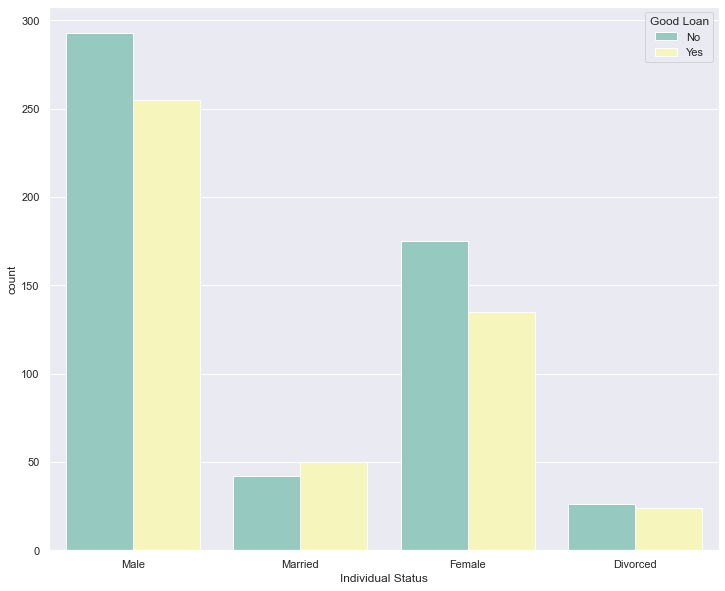

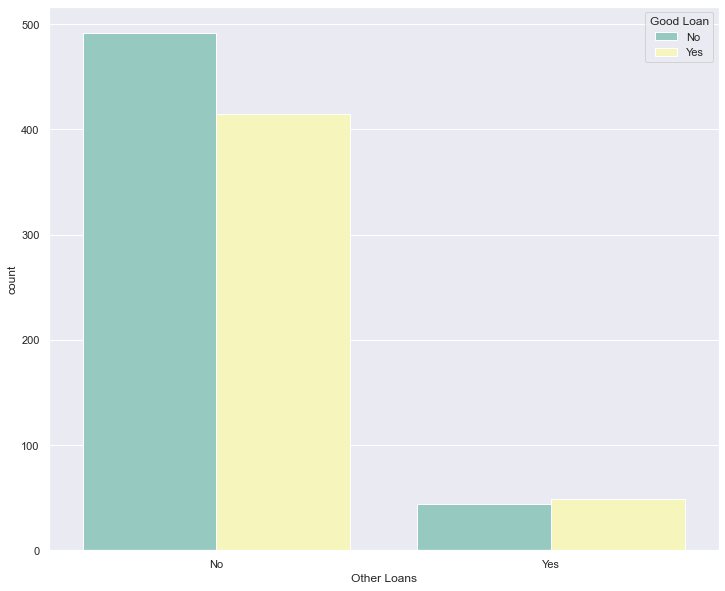

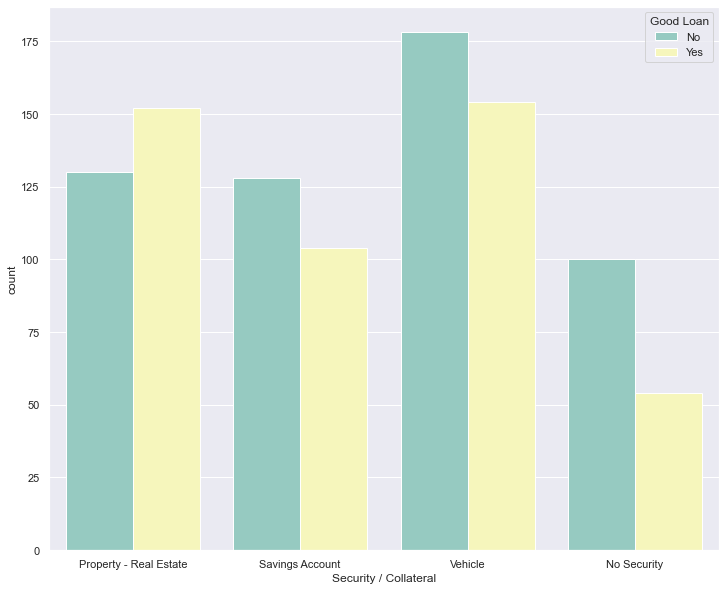

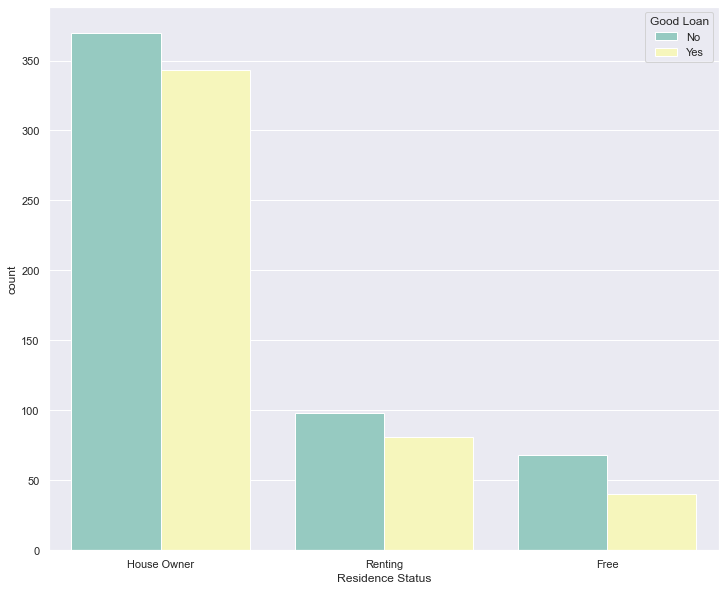

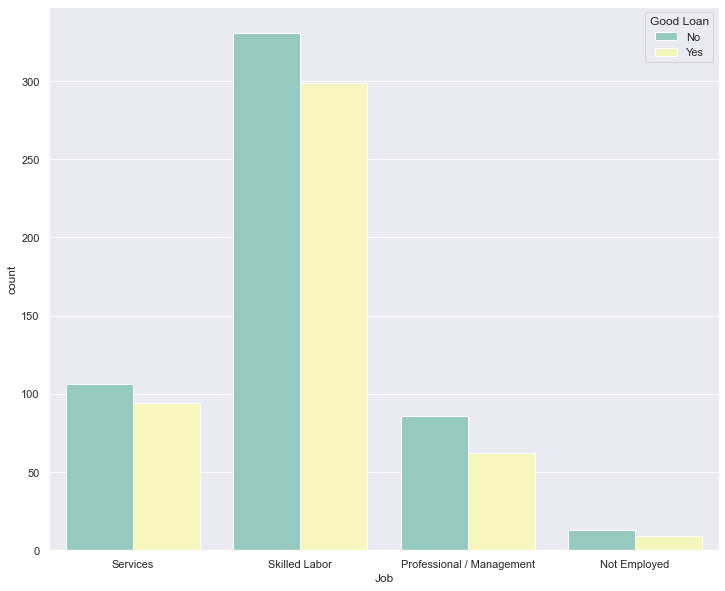

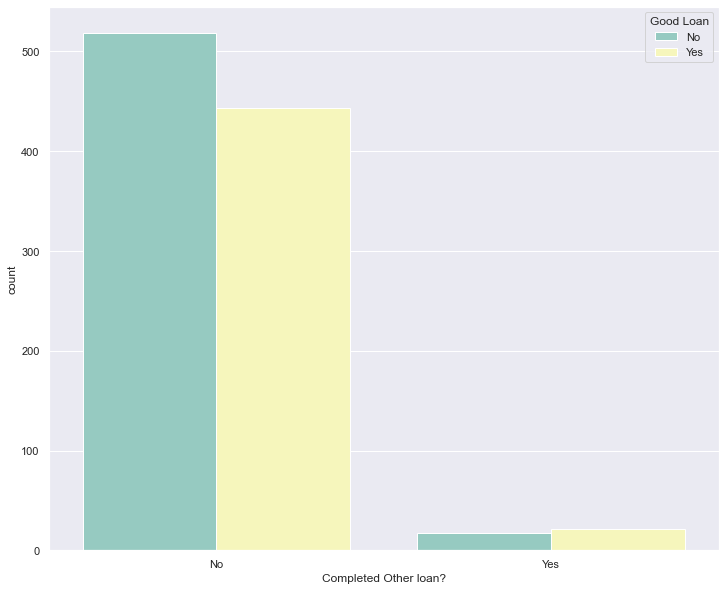

In [16]:
# Investigate relationships between features w.r.t 'Good Loan' - y variable
# This aides selection of important features. 
# Loop through the features and plot a count plot using sns.countplot()

# Create a columns list without the numeric columns - Loan Amount and Age
# Also don't include 'Good Loan' (categorial), because it can be done
# separately.
cat_columns = ['Type of Account', 'Account History', 'Reason for the Loan',
       'Account Savings', 'Employment History',
       'Individual Status', 'Other Loans', 'Security / Collateral',
       'Residence Status', 'Job', 'Completed Other loan?']

for c in cat_columns:
    sns.countplot(x = c, data = df_filtered, palette = 'Set3', hue = 'Good Loan')
    plt.show()

In [17]:
# Convert all important categorical columns into numerical representation
# using get_dummies() method before using logistic algorithm. 
# Can also use Label Encoding and OneHotEncoder from the preprocessing library
# to convert categorical into numerical representation.
# The logistic algorithm does not take categorical features.
# Check the results with one column - 'Account History'
df_cat_num_ah = pd.get_dummies(df_filtered, columns = ['Account History'])

# Investigate changes
df_cat_num_ah

,Type of Account,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Status,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan,Account History_Average (known delays),Account History_Good,Account History_critical
0,No Data,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No,0,0,1
1,No Data,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No,0,0,1
2,No Data,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No,0,0,1
3,No Data,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No,0,0,1
4,No Data,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,Type C,Buying a Used Car,3602.0,0-200,0-2 Years,Female,No,Savings Account,47.0,House Owner,Services,No,No,1,0,0
1000,Type C,TV,4473.0,0-200,2-5 Years,Female,No,Property - Real Estate,35.0,House Owner,Skilled Labor,No,No,1,0,0
1001,Type C,TV,12759.0,500-1000,5-7 Years,Male,No,Vehicle,38.0,House Owner,Professional / Management,No,Yes,1,0,0
1002,Type C,Buying a New Car,2551.0,0-200,7+ Years,Male,No,Vehicle,47.0,House Owner,Services,No,No,1,0,0


In [18]:
# If satisfied with the conversion, apply it to all other categorical columns.
# The below code will get dummies for the whole data (df_filtered data) but 
# only apply to the columns in the features list.
df_cat_num = pd.get_dummies(df_filtered, columns = cat_columns)

In [19]:
print(df_filtered.shape)

(1000, 14)


In [20]:
print(df_cat_num.shape) # shows more columns due to converting categories
# into numerical represtation.

(1000, 49)


In [10]:
# Check the changes
df_cat_num

,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,No,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,No,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,No,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,No,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,No,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3602.0,47.0,No,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1000,4473.0,35.0,No,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
1001,12759.0,38.0,Yes,0,0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1002,2551.0,47.0,No,0,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0


In [ ]:
# Now convert the response y variable (Good Loan) into numerical data.
# To create a new 0-1 y variable, use '0' as No and '1' as Yes.

df_cat_num['Good Loan'][df_cat_num['Good Loan'] == 'Yes'] = 1
df_cat_num['Good Loan'][df_cat_num['Good Loan'] == 'No'] = 0

In [22]:
# Investigate the dataframe. It has all columns including Features and Response.
df_cat_num

,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3602.0,47.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1000,4473.0,35.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
1001,12759.0,38.0,1,0,0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1002,2551.0,47.0,0,0,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0


#### g) Feature Selection

<AxesSubplot:xlabel='Good Loan', ylabel='count'>

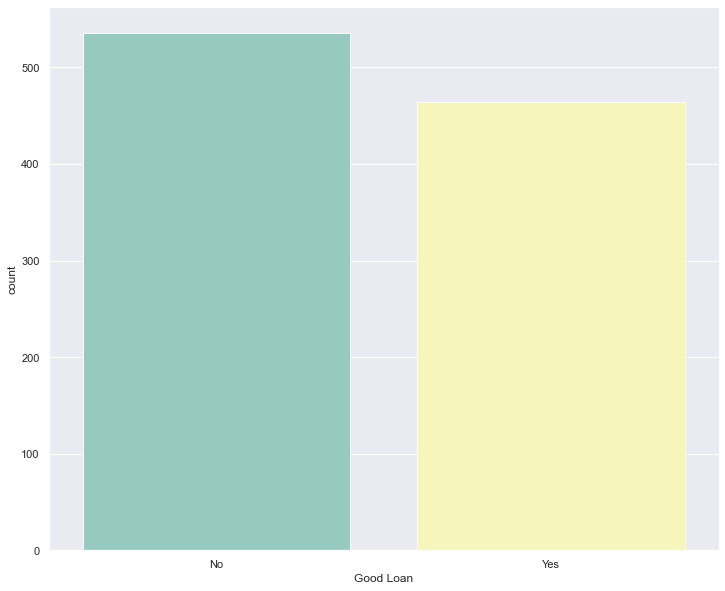

In [107]:
# Investigate the distribution of response variable (y) - Good Loan
sns.countplot(x = 'Good Loan', data = df_filtered, palette = 'Set3')

In [ ]:
# If there are plenty of features, select fewer numbers to avoid high
# computational resources. In this example we will use all of them.

#### i) Feature Importance

#### Steps of Running Feature Importance
- Split the data into X & y
- Run a Tree-based estimators (i.e. decision trees & random forests) 
- Run Feature Importance

In [28]:
# Split the data into X & y for Decision Tree Classifier

X = df_cat_num.drop('Good Loan', axis = 1).values
y = df_cat_num['Good Loan']

# Make sure 'y' is an integer
y = y.astype(int)

print(X.shape)
print(y.shape)

(1000, 48)
(1000,)


In [29]:
##### Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=100, criterion = 'entropy', max_depth = 15)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=100)

In [110]:
# Running Feature Importance

# This shows feature importances for all the features.

for i,column in enumerate(df_cat_num.drop('Good Loan', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))

The feature importance for Loan Amount is : 0.14235885972794823
The feature importance for Age is : 0.08554971228774728
The feature importance for Type of Account_No Data is : 0.04527723812100369
The feature importance for Type of Account_Type A is : 0.04151745327498232
The feature importance for Type of Account_Type B is : 0.015898343224668387
The feature importance for Type of Account_Type C is : 0.004310147022099245
The feature importance for Account History_Average (known delays) is : 0.004268356446140064
The feature importance for Account History_Good is : 0.15971353788196024
The feature importance for Account History_critical is : 0.0
The feature importance for Reason for the Loan_Advance Edu/training is : 0.0
The feature importance for Reason for the Loan_All other is : 0.0
The feature importance for Reason for the Loan_Buying a New Car is : 0.01620481009337136
The feature importance for Reason for the Loan_Buying a Used Car is : 0.005487575682857437
The feature importance for R

In [30]:
# However as Feature Importance is not shown in the order of importance. So to 
# select the features with highest importance is to add them in a DataFrame, 
# order them on the basis of highest values. To do this ;

# Initialize two empty lists.
fi_column = [] # feature importance column equals empty
fi = [] # the actual feature importance equals empty
    
    
# Copy the feature importances code from above
for i,column in enumerate(df_cat_num.drop('Good Loan', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    
    fi_column.append(column) # save the column name in fi_column list
    fi.append(dt.feature_importances_[i]) # save the importance in fi list

The feature importance for Loan Amount is : 0.14235885972794823
The feature importance for Age is : 0.08554971228774728
The feature importance for Type of Account_No Data is : 0.04527723812100369
The feature importance for Type of Account_Type A is : 0.04151745327498232
The feature importance for Type of Account_Type B is : 0.015898343224668387
The feature importance for Type of Account_Type C is : 0.004310147022099245
The feature importance for Account History_Average (known delays) is : 0.004268356446140064
The feature importance for Account History_Good is : 0.15971353788196024
The feature importance for Account History_critical is : 0.0
The feature importance for Reason for the Loan_Advance Edu/training is : 0.0
The feature importance for Reason for the Loan_All other is : 0.0
The feature importance for Reason for the Loan_Buying a New Car is : 0.01620481009337136
The feature importance for Reason for the Loan_Buying a Used Car is : 0.005487575682857437
The feature importance for R

In [34]:
# Adding the feature importances to a DataFrame

# Creating a Dataframe
fi_column
fi

fi_df = zip(fi_column, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df

,Feature,Feature Importance
0,Loan Amount,0.142359
1,Age,0.085550
2,Type of Account_No Data,0.045277
3,Type of Account_Type A,0.041517
4,Type of Account_Type B,0.015898
5,Type of Account_Type C,0.004310
6,Account History_Average (known delays),0.004268
7,Account History_Good,0.159714
8,Account History_critical,0.000000
9,Reason for the Loan_Advance Edu/training,0.000000


In [35]:
# Ordering the data by Feature importance
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

fi_df
# Shows 'Account Savings 0-200' is the feature that gives the most information
# gain when it comes to predicting if its a good loan or a not a good loan.
# Then comes 'Account_History_Good', then 'Loan Amount', then 'Age' and so on..

,index,Feature,Feature Importance
0,19,Account Savings_0-200,0.166570
1,7,Account History_Good,0.159714
2,0,Loan Amount,0.142359
3,1,Age,0.085550
4,2,Type of Account_No Data,0.045277
5,3,Type of Account_Type A,0.041517
6,45,Job_Skilled Labor,0.020224
7,24,Employment History_0-2 Years,0.019338
8,23,Account Savings_No Data,0.018018
9,18,Reason for the Loan_TV,0.016215


In [36]:
# Save the features with the most information gain as columns to be used in the
# model and exclude the rest. 

# Keep the features until index 41 as the rest shows 'zero' feature importance.
fi_df_important = fi_df['Feature'][0:42]

#show fi_df_important
fi_df_important

0                            Account Savings_0-200
1                             Account History_Good
2                                      Loan Amount
3                                              Age
4                          Type of Account_No Data
5                           Type of Account_Type A
6                                Job_Skilled Labor
7                     Employment History_0-2 Years
8                          Account Savings_No Data
9                           Reason for the Loan_TV
10            Reason for the Loan_Buying a New Car
11                           Account Savings_1000+
12                          Type of Account_Type B
13                           Residence Status_Free
14                     Employment History_7+ Years
15              Reason for the Loan_Home furniture
16    Security / Collateral_Property - Real Estate
17                       Individual Status_Married
18                   Security / Collateral_Vehicle
19                             

In [37]:
# Refining DataFrame with just the features that are important - fi_df_important
df_cat_num_features = df_cat_num[fi_df_important]

### 4. Select X and y - Hold-out validation

In [38]:
# Comparing DataFrames before and after Feature Importance
print(df_cat_num.shape)
print(df_cat_num_features.shape)

(1000, 49)
(1000, 42)


In [39]:
# Select Features (X) for logistic regression modelling
X = df_cat_num_features.values
X

array([[1.000000, 0.000000, 2116.000000, ..., 0.000000, 0.000000,
        0.000000],
       [0.000000, 0.000000, 2438.000000, ..., 0.000000, 0.000000,
        0.000000],
       [1.000000, 0.000000, 2144.000000, ..., 0.000000, 0.000000,
        0.000000],
       ...,
       [0.000000, 0.000000, 12759.000000, ..., 0.000000, 0.000000,
        0.000000],
       [1.000000, 0.000000, 2551.000000, ..., 0.000000, 0.000000,
        0.000000],
       [0.000000, 0.000000, 1587.000000, ..., 0.000000, 0.000000,
        0.000000]])

In [40]:
# Select Response (y) for logistic regression modelling
y = df_cat_num['Good Loan']
y = y.astype(int) # converting y from object to int
y

0       0
1       0
2       0
3       0
4       0
       ..
999     0
1000    0
1001    1
1002    0
1003    1
Name: Good Loan, Length: 1000, dtype: int32

In [41]:
# Print shapes
print(X.shape)
print(y.shape)

(1000, 42)
(1000,)


### 5. Data Split for Training

In [42]:
# Hold-out validation

# Splitting into 80/20. 80 - X_Train and y_train and 20 - X_test and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=42)

# Further splitting X_Train and y_train into Train and Valid.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=42)

print(X_train.shape) # Train model
print(X_test.shape)  # Test model
print(X_valid.shape) # Test model after tuning

print(y_train.shape) # Train model
print(y_test.shape)  # Test model
print(y_valid.shape) # Test model after tuning

(720, 42)
(200, 42)
(80, 42)
(720,)
(200,)
(80,)


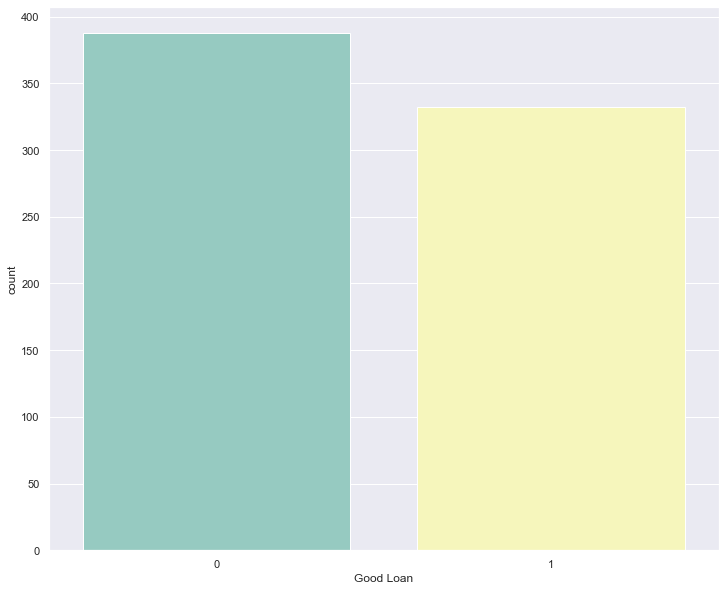

In [43]:
# Investigating the distribution of y_train

ax = sns.countplot(x = y_train, palette = "Set3")

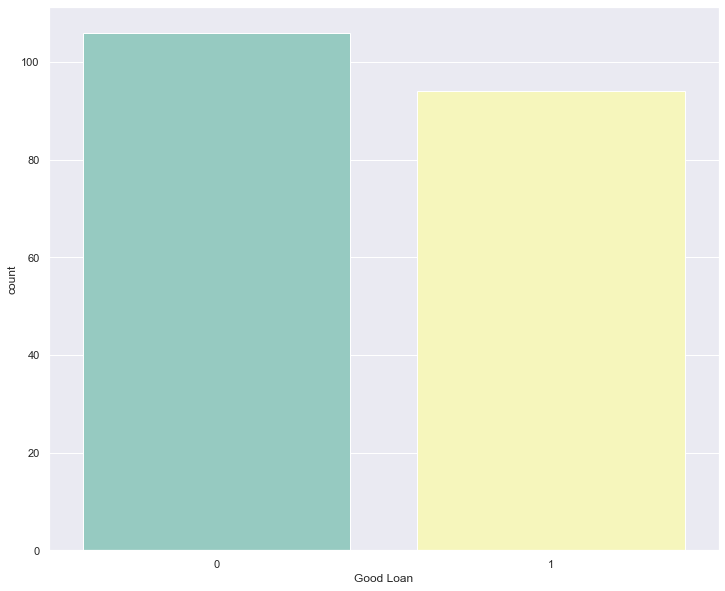

In [44]:
# Investigating the distribution of y_test

ax = sns.countplot(x = y_test, palette = "Set3")

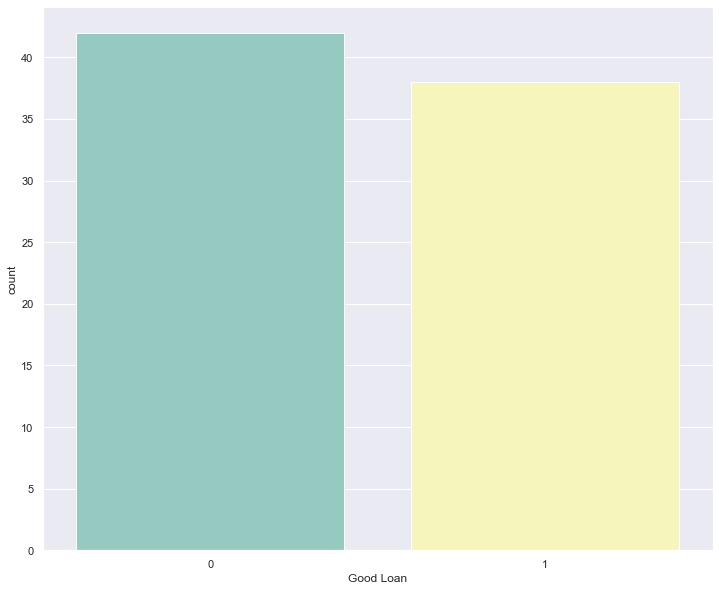

In [45]:
# Investigating the distr of y_valid

ax = sns.countplot(x = y_valid, palette = "Set3")

### 6. Modelling Data - Build Data Model

In [27]:
# Initialize an instance of Logistic Regression model.
lm = LogisticRegression(random_state=10, solver = 'lbfgs', max_iter=1000)  

In [28]:
# Fit the linear regression model to the data. Use 'X' and then 'y'.
model = lm.fit(X_train, y_train)

In [29]:
# Ask the model to predict.
# Pass the testing data which has the input values.
y_predictions_test = model.predict(X_test)
y_predictions_train = model.predict(X_train)

In [124]:
# Show test predictions
y_predictions_test [0:10]

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [125]:
# Inspect shape
y_predictions_test.shape

(200,)

In [28]:
# Show train predictions
y_predictions_train [0:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [126]:
# Inspect shape
y_predictions_train.shape

(720,)

In [30]:
# Show all test predictions
print(y_predictions_test)
type(y_predictions_test)

[1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1
 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1
 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1
 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0
 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0]


numpy.ndarray

In [32]:
# predict_probability - Probability estimates
# pred_probability_train for training dataset.
# It predits the probability of a class being '0' or class being '1'
pred_probability_train = model.predict_proba(X_train)
pred_probability_train
# First one shows [0.781997, 0.218003] 
# This means the probabilty of a class being '0' is 78%
# and the probabilty of a class being '1' is 22%

array([[0.770322, 0.229678],
       [0.276715, 0.723285],
       [0.799959, 0.200041],
       ...,
       [0.511021, 0.488979],
       [0.043572, 0.956428],
       [0.417149, 0.582851]])

In [33]:
# pred_probability_test for testing dataset.
pred_probability_test = model.predict_proba(X_test)
pred_probability_test

array([[0.424657, 0.575343],
       [0.281172, 0.718828],
       [0.507331, 0.492669],
       [0.462994, 0.537006],
       [0.465061, 0.534939],
       [0.527670, 0.472330],
       [0.225093, 0.774907],
       [0.660765, 0.339235],
       [0.284542, 0.715458],
       [0.764710, 0.235290],
       [0.914085, 0.085915],
       [0.937418, 0.062582],
       [0.834813, 0.165187],
       [0.780904, 0.219096],
       [0.452124, 0.547876],
       [0.222031, 0.777969],
       [0.099279, 0.900721],
       [0.977732, 0.022268],
       [0.622771, 0.377229],
       [0.116608, 0.883392],
       [0.631713, 0.368287],
       [0.273504, 0.726496],
       [0.948037, 0.051963],
       [0.454396, 0.545604],
       [0.560500, 0.439500],
       [0.226744, 0.773256],
       [0.985750, 0.014250],
       [0.528218, 0.471782],
       [0.695765, 0.304235],
       [0.949066, 0.050934],
       [0.050953, 0.949047],
       [0.955331, 0.044669],
       [0.720168, 0.279832],
       [0.285291, 0.714709],
       [0.5930

In [31]:
# coef_ - Coefficient of the features in the decision function
model.coef_ # weights for 42 features

array([[-1.605574, 1.969861, -0.000093, 0.002787, -1.274261, 1.082177,
        -0.076741, -0.023930, 0.584862, 0.136163, -0.485608, 0.520508,
        0.204734, -0.000180, -0.006425, 0.306853, 0.553594, -0.114161,
        -0.063234, -0.227827, -0.156786, 0.060465, 0.582959, 0.236663,
        -0.121593, 0.254799, -0.259221, -0.510039, 0.051361, -0.279316,
        0.414718, 0.313529, 0.239510, -0.189116, 0.515445, 0.048650,
        0.094171, -0.355718, -0.041248, -0.100188, -0.201627, -0.236751]])

### 7. Model Evaluation

In [32]:
# Accuracy of model on Train data
print("The Training Accuracy is: ", lm.score(X_train, y_train))

# Accuracy of the model on Test data
print("The Testing Accuracy is: ", lm.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_predictions_train))

The Training Accuracy is:  0.7736111111111111
The Testing Accuracy is:  0.795
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       388
           1       0.76      0.74      0.75       332

    accuracy                           0.77       720
   macro avg       0.77      0.77      0.77       720
weighted avg       0.77      0.77      0.77       720



In [35]:
# Quickly visualizing Confusion Matrix

cm = confusion_matrix(y_train, y_predictions_train)

In [36]:
# Inspect cm
cm
# Predicted 309 zeroes correct but predicted 79 zeroes incorrect

array([[312,  76],
       [ 87, 245]], dtype=int64)

In [37]:
# Inspect cm
np.diag(cm)

array([312, 245], dtype=int64)

In [38]:
# Inspect cm.sum(axis=0)
cm.sum(axis=0) # adds column elements: 312 + 87 = 399 and 76 + 245 = 321

array([399, 321], dtype=int64)

In [39]:
# Inspect cm.sum(axis=1)
cm.sum(axis=1) # adds row elements: 312 + 76 = 388 and 87 + 245 = 332
# So use this in the code below. But reshape it as shown below before using it.

array([388, 332], dtype=int64)

In [40]:
# Inspecting the reshape
cm.sum(axis=1).reshape(-1,1) # Reshape puts it in the right shape.

array([[388],
       [332]], dtype=int64)

In [41]:
# Eg: what %age is 309 zeroes out of 309 + 79 zeroes. So,
# Convert the confusion_matrix output into percentage. And reshape it because
# one is over the another.

cm_percentage = cm / cm.sum(axis=1).reshape(-1,1)
cm_percentage

array([[0.804124, 0.195876],
       [0.262048, 0.737952]])

In [75]:
# Define a function to plot Confusion matrix
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None: # classes are '0' and '1'
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [43]:
# Inspect lm.classes_
lm.classes_

array([0, 1])

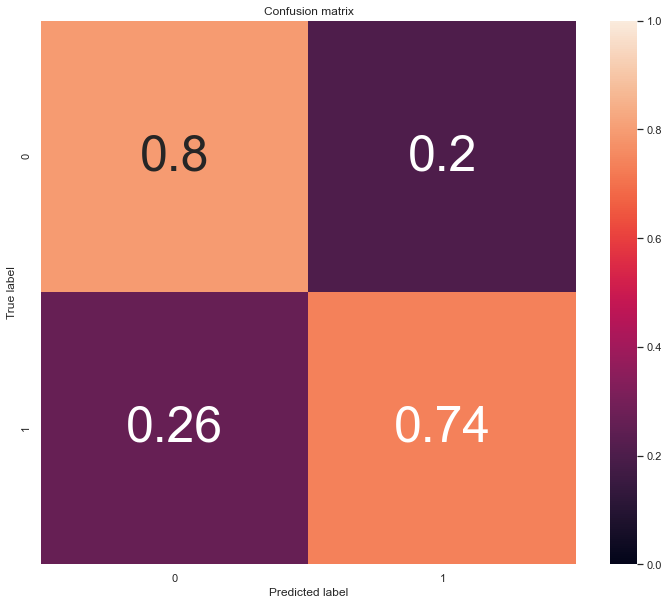

In [138]:
# Call the above function to plot Confusion Matrix
plot_confusion_matrix(cm_percentage, classes = lm.classes_, title='Confusion matrix')

# It shows how well the model predicts each class - 0 and 1.

# For Zeroes - 80% correct prediction and 20% incorrect prediction. Which means
# 80% was correctly predicted as bad loan while 20% was wrongly predicted as 
# good loan. 80% is high enough, so it's accurate.

# Fore Ones - 26% incorrect predictions and 74% correct predictions. Which means
# 26% was predicted as bad loans and 74% was predicted as good loans.

In [44]:
# Calculating Evaluation Metrics

# False Postives is 87 and 76 from cm and then deduct diagonal values 312 & 245.
FP = cm.sum(axis=0) - np.diag(cm) # False Positives (FP)
print("FP is:", FP)

# Same numbers in different order
FN = cm.sum(axis=1) - np.diag(cm) # False Negatives (FN) 
print("FN is:", FN)

# True Postivies are diagonal numbers: [312, 245]
TP = np.diag(cm) # True Positives (TP)
print("TP is:", TP)

# True Negatives are sum of all of our confusion matrix minus FP, FN & TP.
TN = cm.sum() - (FP + FN + TP) # True Negatives (TN)
print("TN is:", TN)

print("")

## Sensitivity, hit rate, recall, or true positive rate (Imp Metric)
TPR = TP / (TP + FN)
print("The TPR is:", TPR)
# It shows [0.804124 0.737952]. This means out of total bad loans (1) the model
# predicted 80% right and out of total good loans (0) the model predicted 73%
# right. Same values in the confusion matrix.

print("The average TPR is:", TPR.sum()/2)

print("")

## Precision or positive predictive value (Imp Metric)
PPV = TP / (TP + FP)
print("The PPV is:", PPV)

print("The average PPV is:", PPV.sum()/2)
# Shows [0.781955 0.763240]. Means 78% of bad loans (0s) were correct and 
# 76% of Good loans (1s) were correct.

print("")

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The FPR is:", FPR)
# Shows [0.262048 0.195876]. Means for bad loans (0s) the model classified 
# 26% as good loans (1s) and for good loans (1s) the model classified 19% as
# bad loans (1s). The model is accurate if the two numbers are as low as possible.

print("The average FPR is:", FPR.sum()/2)

print("")

# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The FNR is: ", FNR)
# Shows [0.195876 0.262048]. Same as the heat map.
print("The average FNR is:", FNR.sum()/2)

print("")

## Logarithmic loss - or Log Loss - or cross-entropy loss
# It's an error metric. If there's a probability or log likelihood  of an observation of being a bad loan (eg: 20%).
# Then 1 - 0.2 = 0.8. There is 80 % loss or 0.8 log loss of that bad loan being 
# a good loan.The attempt is to minimize logarithmic loss as much as possible.
# We can carry out HYPER PARAMETER TUNING to minimize this logarithmic loss.

# It shows which classifier is more accurate eventhough they
# both have similar predictions. Eg classifier with 90% predicted probability is
# more accurate than a classifier with 60% predicted probability even though both
# predit similar outcomes (Good loan). But the classifier with 90% predicted
# probability is a better classifier than the 60% one due to lower loss.

# Running Log loss on training
print("The Log Loss on Training Dataset is: ", log_loss(y_train, pred_probability_train))

# Running Log loss on testing
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_probability_test))


FP is: [87 76]
FN is: [76 87]
TP is: [312 245]
TN is: [245 312]

The TPR is: [0.804124 0.737952]
The average TPR is: 0.771037759284561

The PPV is: [0.781955 0.763240]
The average PPV is: 0.7725973813037266

The FPR is: [0.262048 0.195876]
The average FPR is: 0.22896224071543908

The FNR is:  [0.195876 0.262048]
The average FNR is: 0.22896224071543908

The Log Loss on Training Dataset is:  0.44701797971736346
The Log Loss on Testing Dataset is:  0.4558122341621194


### 8. Model Tuning - Hyper Parameter Tuning

In [47]:
# Display C values - one of the parameteres of logrithmic regression. 
# Similar parameters can be tweaked for better results. Refer documentation
# for parameters of logrithmic regression.

C_Values_List = np.geomspace(1e-5, 1e5, num=20)
C_Values_List

array([0.000010, 0.000034, 0.000113, 0.000379, 0.001274, 0.004281,
       0.014384, 0.048329, 0.162378, 0.545559, 1.832981, 6.158482,
       20.691381, 69.519280, 233.572147, 784.759970, 2636.650899,
       8858.667904, 29763.514416, 100000.000000])

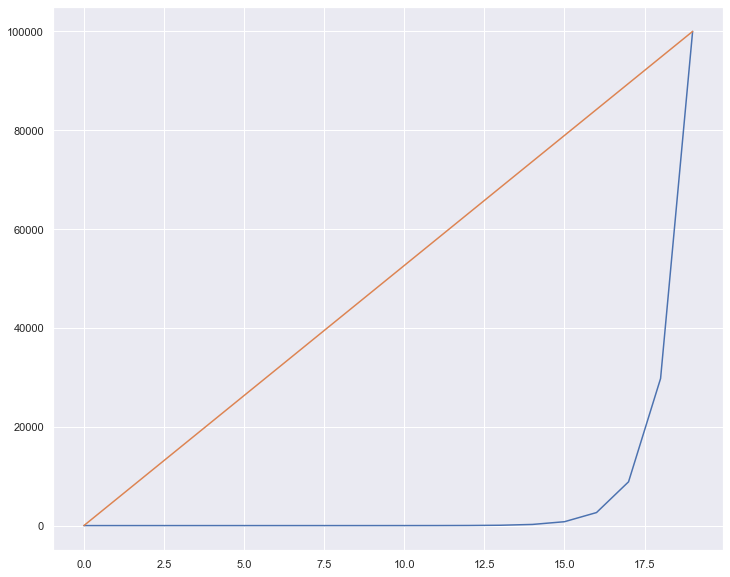

In [46]:
# Plotting C values

plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace


In [50]:
# Loop through the above C values (inverse of regularization strength) to
# penalize larger values of C parameter to avoid over fitting. Also helps
# to move from the local minimum to global minimum for better solutions.

C_Values_List = np.geomspace(1e-5, 1e5, num=20)
CA = [] #Classification Accuracy empty list. 'CA' indicates Classification Accuracy.
Logarithmic_Loss = []

for c_values in C_Values_List:
    lm2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c_values, max_iter=1000)
    model2 = lm2.fit(X_train, y_train)
    score2 = lm2.score(X_test, y_test)
    CA.append(score2)
    print("The CA of C parameter {} is {}:".format(c_values, score2))
    pred_proba_test = lm2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_test)
    Logarithmic_Loss.append(log_loss2)
    print("The Log Loss of C parameter {} is {}:".format(c_values, log_loss2))
    print("")
# We want to choose observations with highest CA and lowest Log Loss. In cases
# of conflict between CA and Log loss, chose log loss as the decision metric.

The CA of C parameter 1e-05 is 0.515:
The Log Loss of C parameter 1e-05 is 0.6920166597415749:

The CA of C parameter 3.359818286283781e-05 is 0.495:
The Log Loss of C parameter 3.359818286283781e-05 is 0.6927819371829886:

The CA of C parameter 0.00011288378916846884 is 0.535:
The Log Loss of C parameter 0.00011288378916846884 is 0.6896531170642062:

The CA of C parameter 0.000379269019073225 is 0.53:
The Log Loss of C parameter 0.000379269019073225 is 0.6857846910037836:

The CA of C parameter 0.0012742749857031334 is 0.625:
The Log Loss of C parameter 0.0012742749857031334 is 0.667568223179066:

The CA of C parameter 0.004281332398719391 is 0.765:
The Log Loss of C parameter 0.004281332398719391 is 0.620134578069698:

The CA of C parameter 0.01438449888287663 is 0.8:
The Log Loss of C parameter 0.01438449888287663 is 0.5512945641606813:

The CA of C parameter 0.04832930238571752 is 0.785:
The Log Loss of C parameter 0.04832930238571752 is 0.49435347514438716:

The CA of C parameter 

In [ ]:
# Take the above results and place it in a DataFrame for better understanding.

In [63]:
# Investigate CA list and Logarithmic_Loss Shape
#CA.shape and Logarithmic_Loss.shape - it does not have a shape . 
# Therefore place it into np.array
np.array(CA)
np.array(Logarithmic_Loss)

array([0.692017, 0.692782, 0.689653, 0.685785, 0.667568, 0.620135,
       0.551295, 0.494353, 0.470065, 0.466767, 0.466848, 0.456653,
       0.456500, 0.463731, 0.463769, 0.463894, 0.463640, 0.455481,
       0.462692, 0.463729])

In [64]:
# Reshpae np.array(CA) and np.array(Logarithmic_Loss)
CA_reshaped = np.array(CA).reshape (20, )
CA_reshaped # .shape shows (20, )

Logarithmic_Loss_reshaped = np.array(Logarithmic_Loss).reshape(20, )
Logarithmic_Loss_reshaped # .shape shows (20, )

array([0.692017, 0.692782, 0.689653, 0.685785, 0.667568, 0.620135,
       0.551295, 0.494353, 0.470065, 0.466767, 0.466848, 0.456653,
       0.456500, 0.463731, 0.463769, 0.463894, 0.463640, 0.455481,
       0.462692, 0.463729])

In [65]:
# Zip it so it places both list next to each other
ziplist = zip(C_Values_List, CA_reshaped, Logarithmic_Loss_reshaped)

In [66]:
# Take this zip list and pass it into a DataFrame
df_ziplist = pd.DataFrame(ziplist, columns = ["C_Values_List", 'CA_reshaped','Logarithmic_Loss_reshaped'])

In [67]:
#print
df_ziplist

,C_Values_List,CA_reshaped,Logarithmic_Loss_reshaped
0,0.000010,0.515,0.692017
1,0.000034,0.495,0.692782
2,0.000113,0.535,0.689653
3,0.000379,0.530,0.685785
4,0.001274,0.625,0.667568
5,0.004281,0.765,0.620135
6,0.014384,0.800,0.551295
7,0.048329,0.785,0.494353
8,0.162378,0.780,0.470065
9,0.545559,0.795,0.466767


In [68]:
# Ordering the data using sort_values
df_ziplist.sort_values("Logarithmic_Loss_reshaped", ascending = True).reset_index()

# Take the optimal C parameter (one with lowest log loss) and run a new 
# logistic regression model and manually set the C Parameter with the optimal
# C Parameter (8858.667904) from this list

,index,C_Values_List,CA_reshaped,Logarithmic_Loss_reshaped
0,17,8858.667904,0.780,0.455481
1,12,20.691381,0.775,0.456500
2,11,6.158482,0.775,0.456653
3,18,29763.514416,0.790,0.462692
4,16,2636.650899,0.785,0.463640
5,19,100000.000000,0.785,0.463729
6,13,69.519280,0.785,0.463731
7,14,233.572147,0.785,0.463769
8,15,784.759970,0.785,0.463894
9,9,0.545559,0.795,0.466767


In [69]:
# Another way of doing the above
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
lm3 = LogisticRegressionCV(random_state=15, Cs = C_Values_List, solver ='lbfgs')
lm3.fit(X_train, y_train)
print("The CA is:", lm3.score(X_test, y_test))
pred_proba_3_test = lm3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_3_test)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", lm3.C_)


The CA is: 0.795
The Logistic Loss is:  0.46649713049365377
The optimal C parameter is:  [0.162378]


The CA of C parameter 1e-05 is 0.515:
The Log Loss of C parameter 1e-05 is 0.6920166597415749:



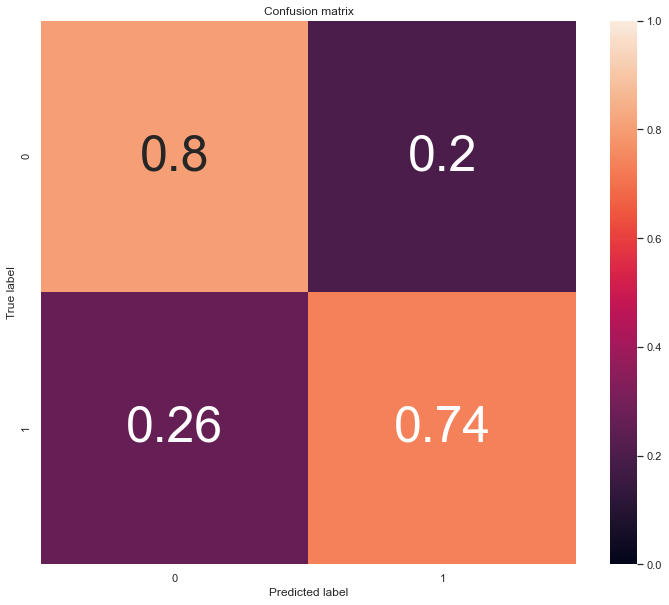

The CA of C parameter 3.359818286283781e-05 is 0.495:
The Log Loss of C parameter 3.359818286283781e-05 is 0.6927819371829886:



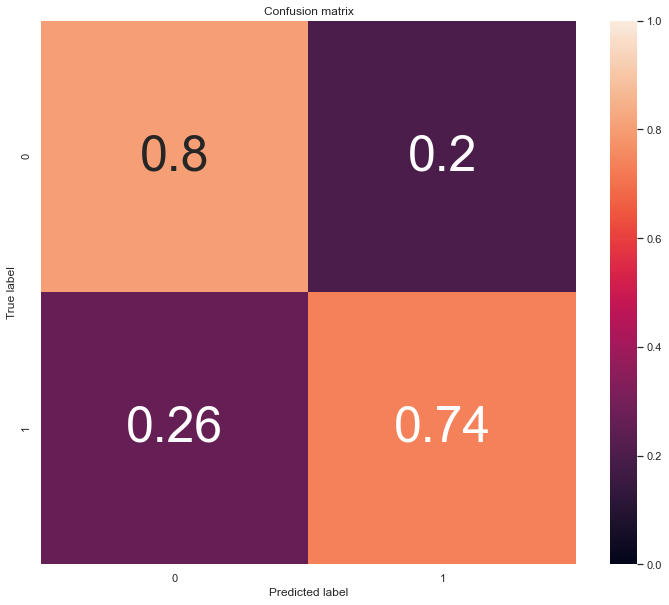

The CA of C parameter 0.00011288378916846884 is 0.535:
The Log Loss of C parameter 0.00011288378916846884 is 0.6896531170642062:



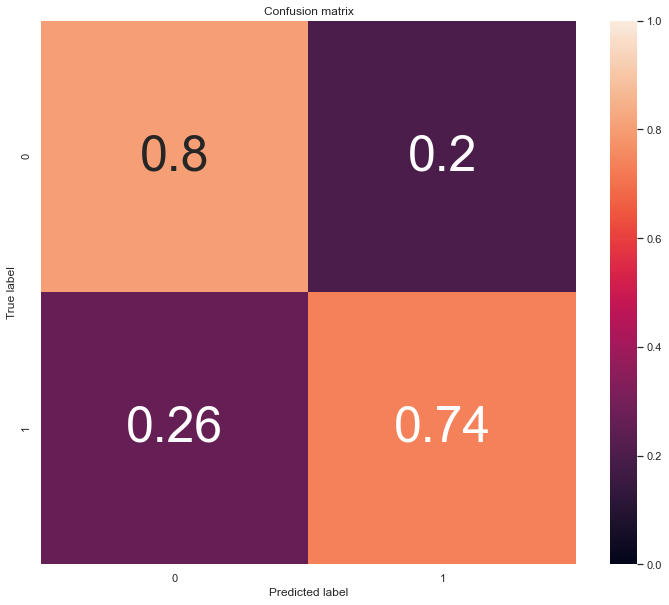

The CA of C parameter 0.000379269019073225 is 0.53:
The Log Loss of C parameter 0.000379269019073225 is 0.6857846910037836:



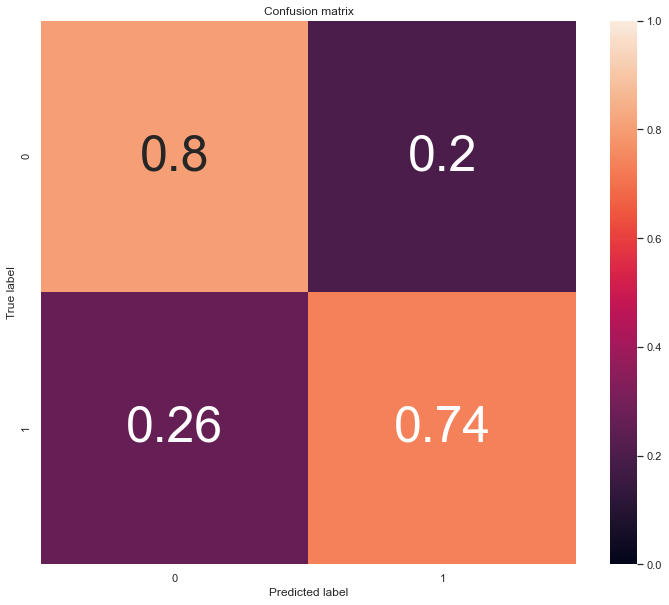

The CA of C parameter 0.0012742749857031334 is 0.625:
The Log Loss of C parameter 0.0012742749857031334 is 0.667568223179066:



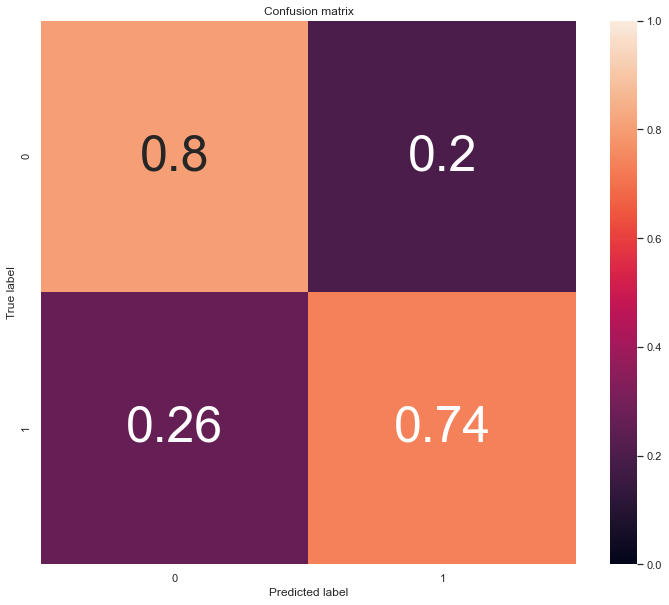

The CA of C parameter 0.004281332398719391 is 0.765:
The Log Loss of C parameter 0.004281332398719391 is 0.620134578069698:



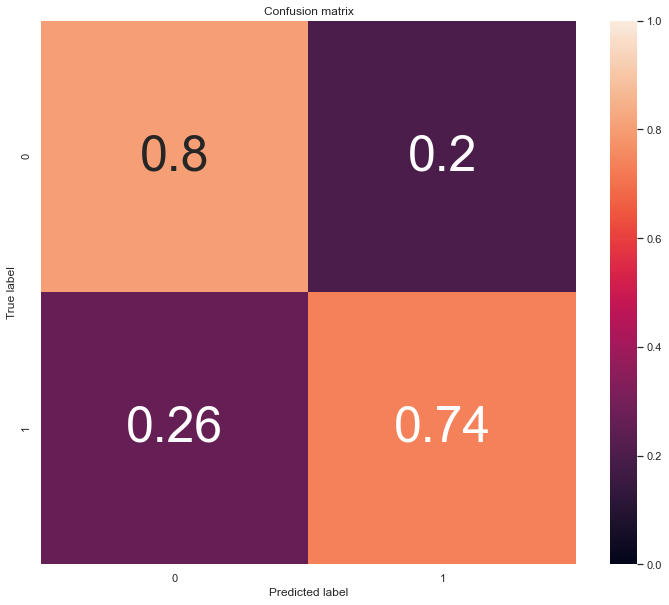

The CA of C parameter 0.01438449888287663 is 0.8:
The Log Loss of C parameter 0.01438449888287663 is 0.5512945641606813:



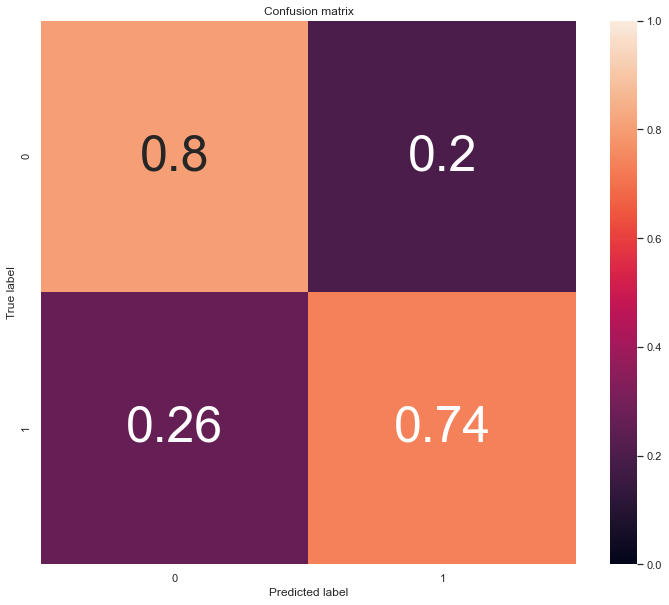

The CA of C parameter 0.04832930238571752 is 0.785:
The Log Loss of C parameter 0.04832930238571752 is 0.49435347514438716:



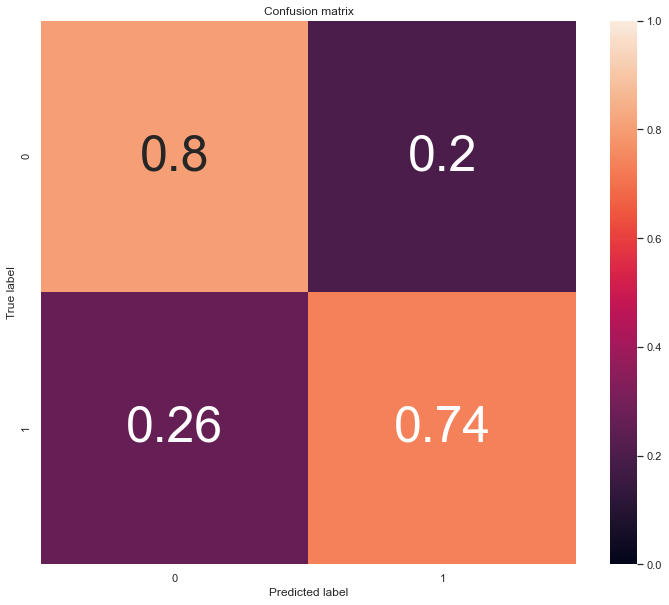

The CA of C parameter 0.1623776739188721 is 0.78:
The Log Loss of C parameter 0.1623776739188721 is 0.47006542281838426:



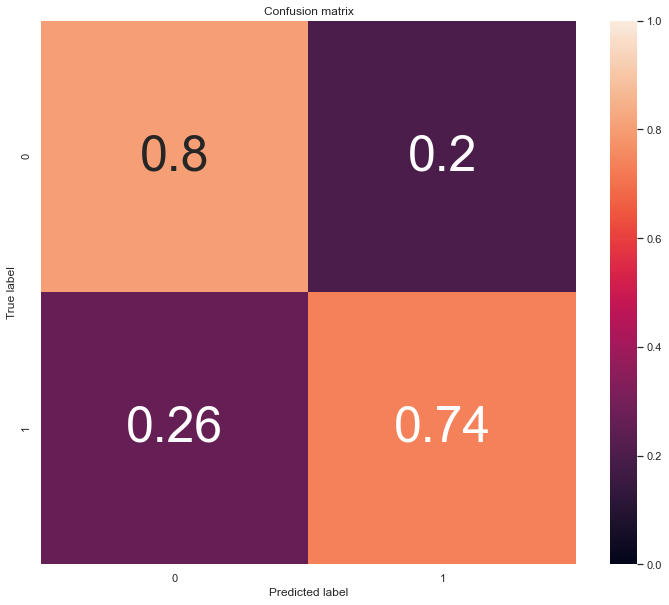

The CA of C parameter 0.5455594781168515 is 0.795:
The Log Loss of C parameter 0.5455594781168515 is 0.4667665951760264:



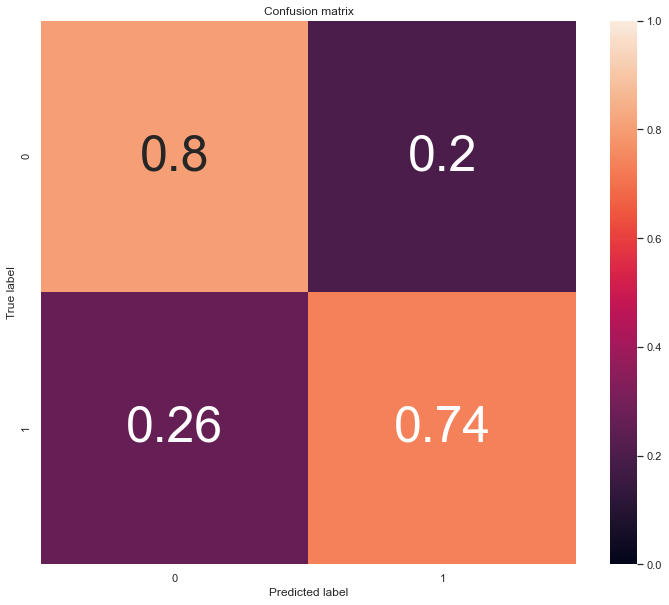

The CA of C parameter 1.8329807108324339 is 0.79:
The Log Loss of C parameter 1.8329807108324339 is 0.46684827025827924:



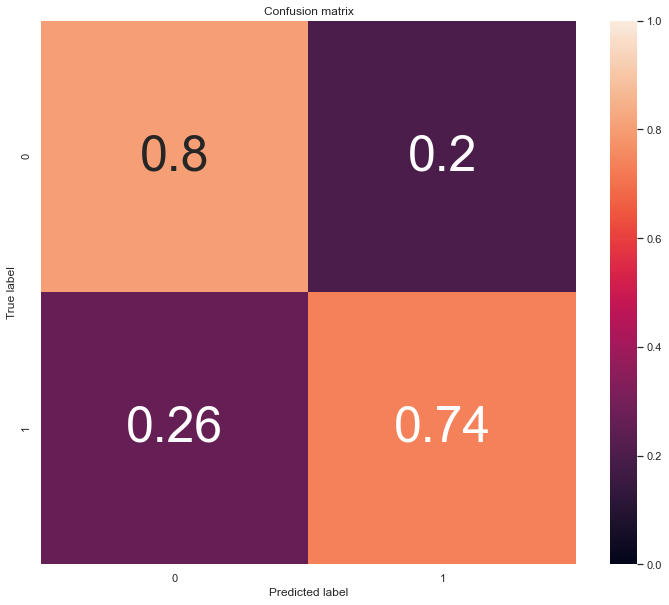

The CA of C parameter 6.1584821106602545 is 0.775:
The Log Loss of C parameter 6.1584821106602545 is 0.4566531122115735:



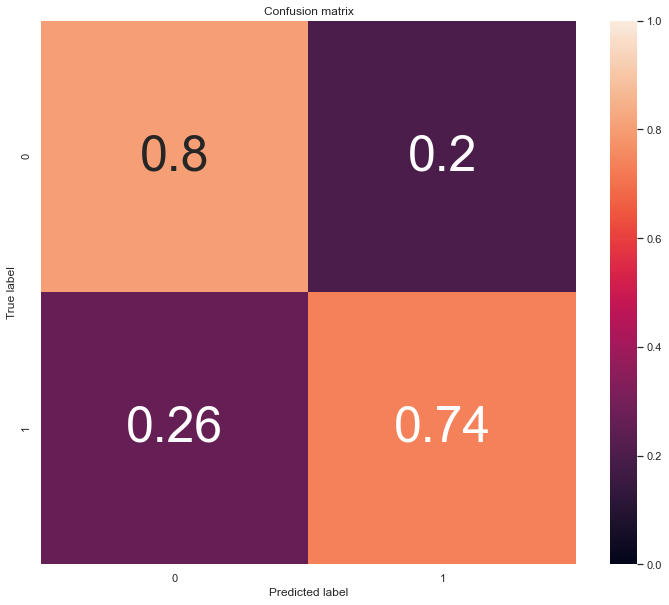

The CA of C parameter 20.6913808111479 is 0.775:
The Log Loss of C parameter 20.6913808111479 is 0.4565000448673407:



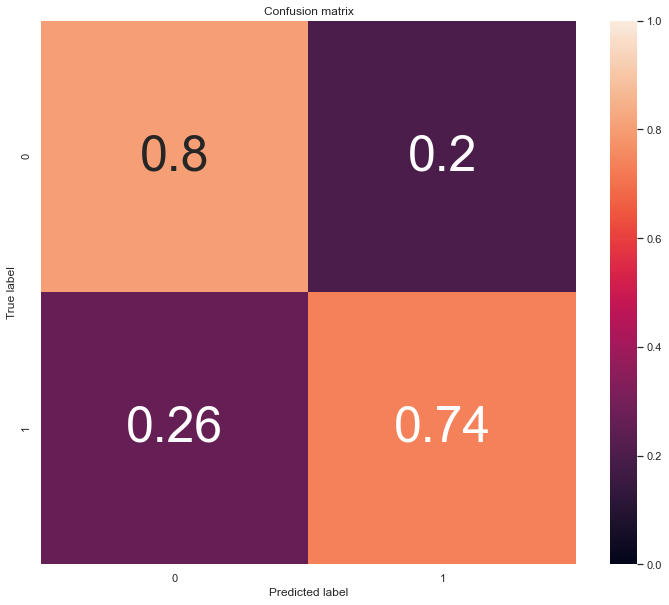

The CA of C parameter 69.51927961775606 is 0.785:
The Log Loss of C parameter 69.51927961775606 is 0.46373061014750794:



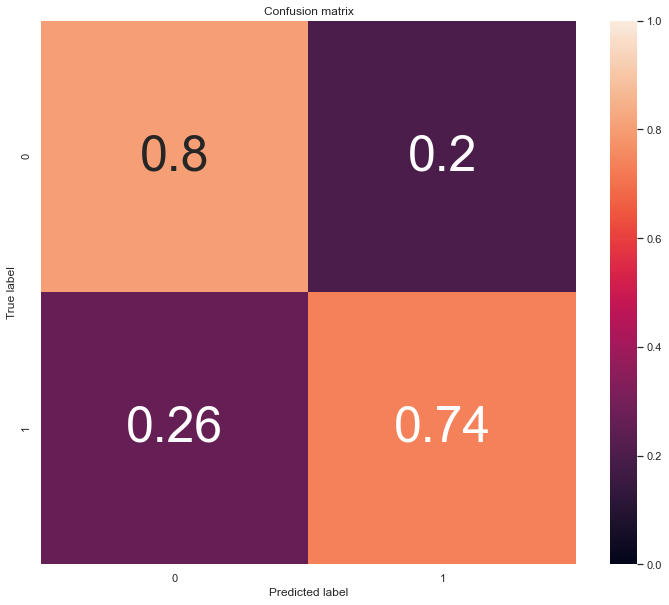

The CA of C parameter 233.57214690901213 is 0.785:
The Log Loss of C parameter 233.57214690901213 is 0.4637686920736492:



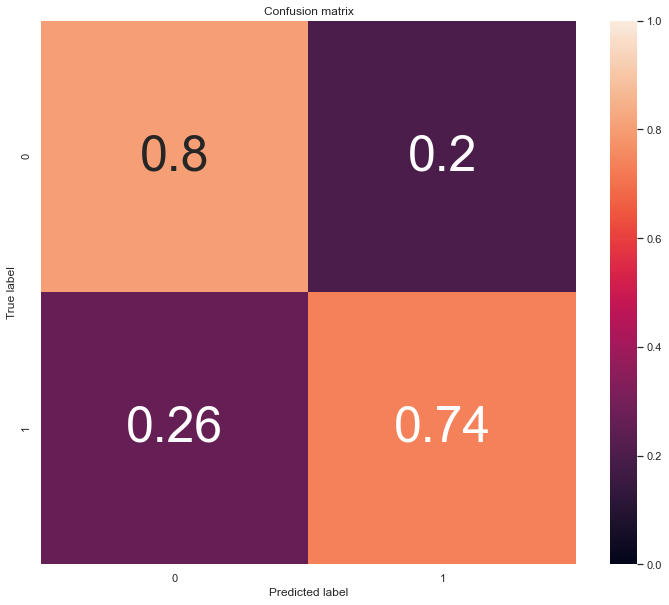

The CA of C parameter 784.7599703514607 is 0.785:
The Log Loss of C parameter 784.7599703514607 is 0.4638940973239759:



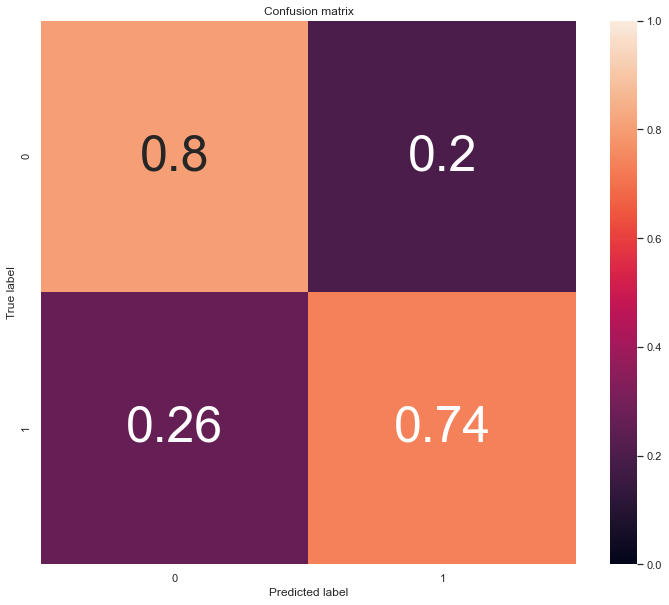

The CA of C parameter 2636.6508987303555 is 0.785:
The Log Loss of C parameter 2636.6508987303555 is 0.463640239780483:



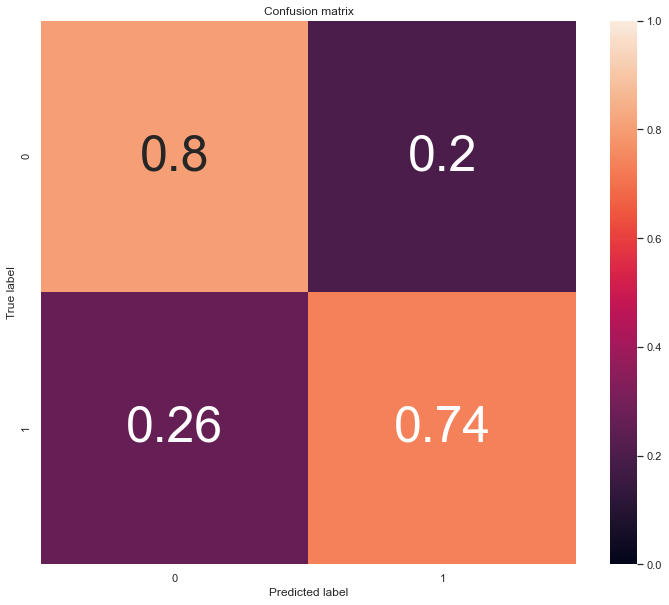

The CA of C parameter 8858.667904100832 is 0.78:
The Log Loss of C parameter 8858.667904100832 is 0.4554806009322415:



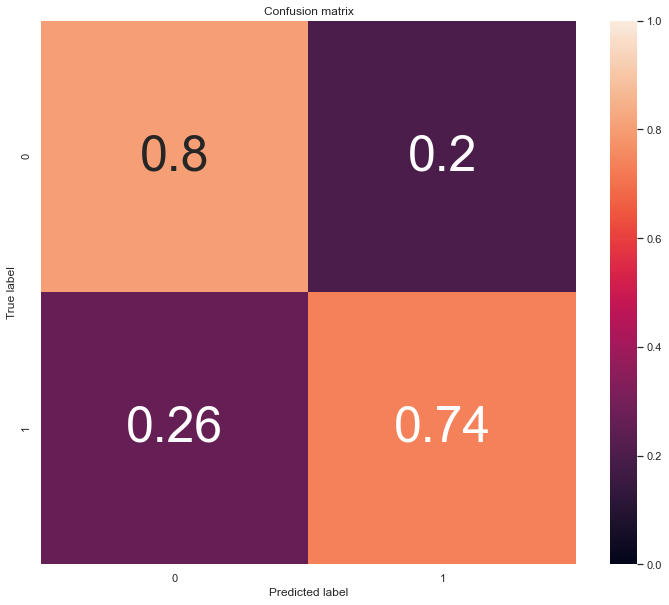

The CA of C parameter 29763.51441631313 is 0.79:
The Log Loss of C parameter 29763.51441631313 is 0.46269169167243956:



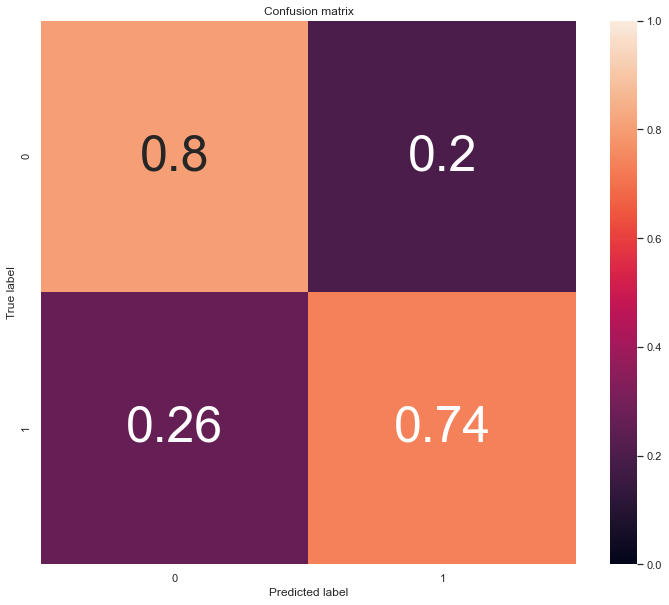

The CA of C parameter 100000.0 is 0.785:
The Log Loss of C parameter 100000.0 is 0.463729390806395:



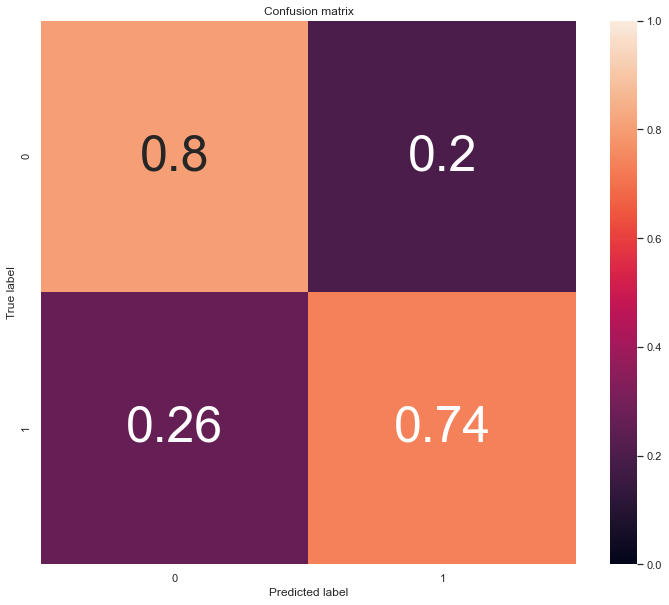

In [76]:
# Evaluating the model using confusion matrix for each parameter C.

# Again, loop through the above C values and plot a confusion matrix.

C_Values_List = np.geomspace(1e-5, 1e5, num=20)
CA = [] #Classification Accuracy empty list. 'CA' indicates Classification Accuracy.
Logarithmic_Loss = []

for c_values in C_Values_List:
    lm2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c_values, max_iter=1000)
    model2 = lm2.fit(X_train, y_train)
    score2 = lm2.score(X_test, y_test)
    CA.append(score2)
    print("The CA of C parameter {} is {}:".format(c_values, score2))
    pred_proba_test = lm2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_test)
    Logarithmic_Loss.append(log_loss2)
    print("The Log Loss of C parameter {} is {}:".format(c_values, log_loss2))
    print("")
    
    # loops the confusion matrix for each c_value in C_Values_List
    y_preditions_train = lm2.predict(X_train) 
    cm = confusion_matrix(y_train, y_predictions_train)
    cm_percentage = cm / cm.sum(axis=1).reshape(-1,1)
    plot_confusion_matrix(cm_percentage, classes = lm.classes_, title='Confusion matrix')
    plt.show() # important because this plots confusion matrix for each C parmeter.

### 9. Model Performance Comparison

In [82]:
# Training a Dummy Classifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
score = dummy_clasf.score(X_test, y_test)

pred_proba_dummy_clf = dummy_clf.predict_proba(X_test)
log_loss_dummy_clf = log_loss(y_test, pred_proba_dummy_clf)

print("Dummy Classifier test accuracy:", score) 
# Dummy classifier gets 0.53. 53% accuracy, which is less than the CA score of 
# actual classifer 0.780 (78%).
print("Dummy Classifier Log Loss:", log_loss_dummy_clf)
# Dummy classifier gets 16.233 which is high compared to the actual classifier (0.455481)

# So the actual classifier is better than the dummy classifier.

Dummy Classifier test accuracy: 0.53
Dummy Classifier Log Loss: 16.233224905608022


### 10. Final Model

In [83]:
# Use the identified optimal C parameter, run a new logistic regression model
# and evaluate the model on the 10% unseen data.

lm_final = LogisticRegression(random_state=10, solver = 'lbfgs', C=8858.667904, max_iter=1000)
model_final = lm_final.fit(X_train, y_train)
score_final = lm_final.score(X_valid, y_valid)

pred_proba_final = lm_final.predict_proba(X_valid)
log_loss_final = log_loss(y_valid, pred_proba_final)

print("Final Classifier test accuracy:", score_final) 

print("Final Classifier Log Loss:", log_loss_final)

Final Classifier test accuracy: 0.7
Final Classifier Log Loss: 0.5712858785746879


### 10. Deploy Model

In [ ]:
# Deploy the final model in the cloud or a CRM system or visualization tools to
# aid the Bank in all future loan approval decisions. Saves time and money
# Deploy it on the the Bank website for customers to quicly check thier laon approval
# eligibilty. Saves time and money for the customers.
# Reduces time for loan approval process which in turn improves customer service.
# Helps Bank to educate customers on factors that will improve chances of future 
# loan being approved. Improves customer engagement, service and retention.